# Logistic Regression - Chemicals Segregation

## Can you Separate the chemicals?
### Binary Classification Challenge
A chemist has two chemical flasks labelled 1 and 0 which contains two different chemicals. He extracted 3 features from these chemicals in order to distinguish between them. You are provided with the results derived by the chemist and your task is to create a model that will label chemical 0 or 1 given its three features.

### Data Description
You are provided with two files test and train. 
>● **Train :** This files consists of two csv files Logistic Xtrain and LogisticYtrain. Xtrain consists of the features whereas Ytrain consists of the labels associated with the features.

>● **Test :** This file consists of a file Logistic Xtest consisting of the features of test data

In [1]:
# Importing Necessary Libraries 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

In [2]:
# Importing Training Data

dfx = pd.read_csv('./Chemicals Segregation Data/Training Data/Logistic_X_Train.csv')
dfy = pd.read_csv('./Chemicals Segregation Data/Training Data/Logistic_Y_Train.csv')

print(dfx.shape, type(dfx), dfx, dfy.shape, type(dfx), dfy, sep='\n\n')

(3000, 3)

<class 'pandas.core.frame.DataFrame'>

            f1        f2        f3
0    -1.239375  0.749101 -0.528515
1    -1.036070  0.801436 -1.283712
2    -0.615579  1.579521 -1.391927
3     1.335978  1.348651  1.433564
4     0.658925  1.300019  0.571603
...        ...       ...       ...
2995 -0.455628  1.302303 -1.338027
2996 -0.434551  1.597813 -1.748643
2997  0.088277  1.638789 -2.193641
2998  1.525155  0.859234  1.505308
2999 -0.979817  0.563954 -1.539394

[3000 rows x 3 columns]

(3000, 1)

<class 'pandas.core.frame.DataFrame'>

      label
0         1
1         1
2         1
3         0
4         0
...     ...
2995      1
2996      1
2997      1
2998      0
2999      1

[3000 rows x 1 columns]


In [3]:
# Combining Features and Label into one DataFrame

df = pd.DataFrame()
df[['f1', 'f2', 'f3']] = dfx
df['label'] = dfy
df

,f1,f2,f3,label
0,-1.239375,0.749101,-0.528515,1
1,-1.036070,0.801436,-1.283712,1
2,-0.615579,1.579521,-1.391927,1
3,1.335978,1.348651,1.433564,0
4,0.658925,1.300019,0.571603,0
...,...,...,...,...
2995,-0.455628,1.302303,-1.338027,1
2996,-0.434551,1.597813,-1.748643,1
2997,0.088277,1.638789,-2.193641,1
2998,1.525155,0.859234,1.505308,0


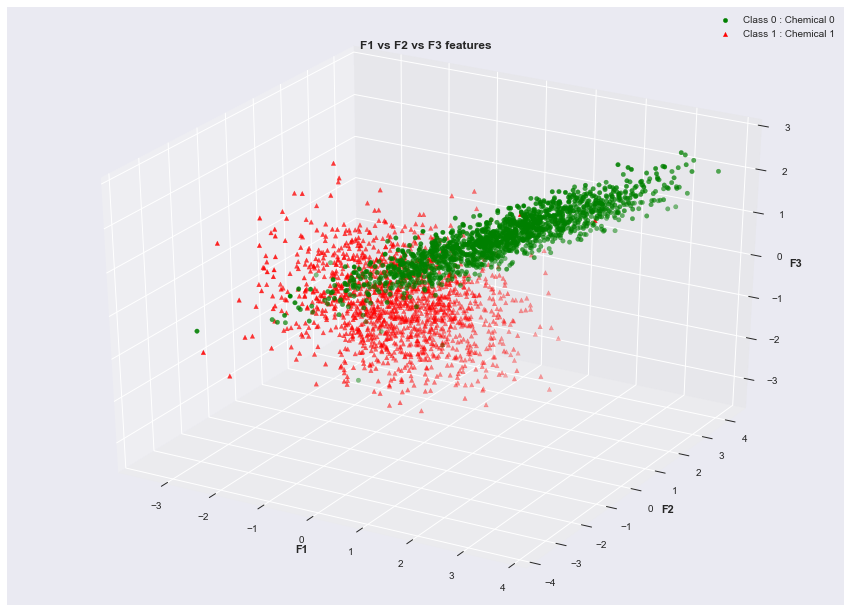

In [4]:
# Plotting the Train Data

from mpl_toolkits import mplot3d

plt.figure(figsize=(15,11))
ax = plt.axes(projection ='3d')

ax.scatter3D(df[df['label'] == 0]['f1'], df[df['label'] == 0]['f2'], df[df['label'] == 0]['f3'], label='Class 0 : Chemical 0', color='g')
ax.scatter3D(df[df['label'] == 1]['f1'], df[df['label'] == 1]['f2'], df[df['label'] == 1]['f3'], color='r', marker='^', label='Class 1 : Chemical 1')
ax.set_xlabel('F1', fontweight='bold')
ax.set_ylabel('F2', fontweight='bold')
ax.set_zlabel('F3', fontweight='bold')
plt.title('F1 vs F2 vs F3 features', fontweight='bold')
plt.legend()
plt.show()

In [5]:
# Train_Data into NDarray

XTrain = dfx.values
YTrain = dfy.values.reshape(-1)

print(XTrain.shape, type(XTrain), XTrain, YTrain.shape, type(YTrain), YTrain, sep='\n\n')

(3000, 3)

<class 'numpy.ndarray'>

[[-1.23937466  0.74910149 -0.52851491]
 [-1.03607028  0.80143631 -1.28371152]
 [-0.61557914  1.57952053 -1.39192706]
 ...
 [ 0.08827657  1.63878904 -2.19364056]
 [ 1.52515501  0.85923429  1.50530791]
 [-0.97981744  0.56395376 -1.53939416]]

(3000,)

<class 'numpy.ndarray'>

[1 1 1 ... 1 0 1]


### Implementing Logistic Regression Algorithm

In [6]:
# Hypothesis function : h(x) = m*x + c {Here, w*x + b}

def hypothesis(x, w, b):
    '''accepts input vector x, input weight vector w and bias(intercept) b'''
    hx = np.dot(x, w) + b
    return sigmoid(hx)

In [7]:
# Sigmoid function : g(z) = 1/(1+e^(-z))

def sigmoid(h):
    return 1.0/(1.0 + np.exp(-1.0*h))

In [8]:
# Error Function i.e., log likelihood function {maximising likelihood eqn}

def error(y, x, w, b):
    m = x.shape[0]
    err = 0.0
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        err += y[i]*np.log2(hx)+(1-y[i])*np.log2(1-hx)
    return err/m       # Returning the mean absolute error

In [9]:
# Applying the update rule, Getting the gradient for w {weight} and b {bias}

def get_grad(x, w, b, y):
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    m = x.shape[0]
    for i in range(m):
        hx = hypothesis(x[i], w, b)
        grad_w += (y[i] - hx)*x[i]
        grad_b +=  (y[i]-hx)
    
    grad_w /= m
    grad_b /= m
    return [grad_w, grad_b]

In [10]:
# Gradient Descent Function

def gradient_descent(x, y, w, b, learning_rate=0.01):
    err = error(y, x, w, b)
    [grad_w, grad_b] = get_grad(x, w, b, y)
    w = w + learning_rate * grad_w
    b = b + learning_rate * grad_b
    return err, w, b

In [11]:
# Predict() function to get the confidence for a point to be in a class
# and predicting result i.e., Label/Class {0 or 1} for a set of features

def predict(x, w, b):
    
    confidence = hypothesis(x, w, b)
    if confidence < 0.5:
        return 0
    else:
        return 1

In [12]:
# get_acc() i.e., accuracy function to get the accuracy of the predictions

def get_acc(x_tst, y_tst, w, b):
    
    y_pred = []
    
    for i in range(y_tst.shape[0]):
        p = predict(x_tst[i], w, b)
        y_pred.append(p)
        
    y_pred = np.array(y_pred)
    
    return  float((y_pred==y_tst).sum())/y_tst.shape[0]

In [13]:
# For Building Model, giving some random values for W and b

loss = []
acc = []

W = 2*np.random.random((XTrain.shape[1],))
b = 5*np.random.random()

In [14]:
# Training our Logistic Regression Model by train data and getting the Optimal value of the parameters of Hyperplane
# Also, saving loss value after every prediction, and accuracy of every prediction in lists loss[] and acc[]

for i in range(YTrain.shape[0]):
    l, W, b = gradient_descent(XTrain, YTrain, W, b, learning_rate=0.1)
    acc.append(get_acc(XTrain, YTrain, W, b))  # Getting the accuracy of the predictions given by the model for train data
    loss.append(l)

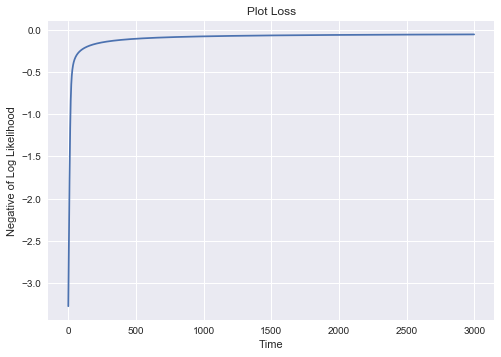

In [15]:
# Plotting the Loss with time {training more}
# (For maximizing the probability, the loss should be gradually increasing)
# and the likelihood shold be minimizing as -ve value {greatest -ve}

plt.plot(loss)
plt.ylabel("Negative of Log Likelihood")
plt.xlabel("Time")
plt.title("Plot Loss")
plt.show()

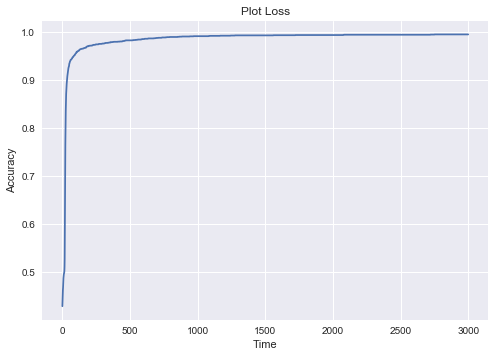

Accuracy : 0.9943333333333333 
	i.e., 99.43333333333332 %


In [16]:
# Plotting the Accuracy of the predictions with time {training more}
# and also print the Accuracy of our model for the given train data

plt.plot(acc)
plt.ylabel("Accuracy")
plt.xlabel("Time")
plt.title("Plot Loss")
plt.show()

print('Accuracy :', acc[-1], '\n\ti.e.,', acc[-1]*100, '%')

In [17]:
# Printing the parameters of the Decision Boundary we get
# after training model i.e., W {weight or coffecients} and b {intercept}

print(W)         # Value of a, b and c in the equation a*X1+b*X2+c*X3+d=0
print(b)         #Value of d (or intercept) in the equation a*X1+b*X2+c*X3+d=0

[-2.98456246  2.25069904 -2.49126233]
-2.870258404611347


### Plotting the Hyperplane (Decision Boundary)

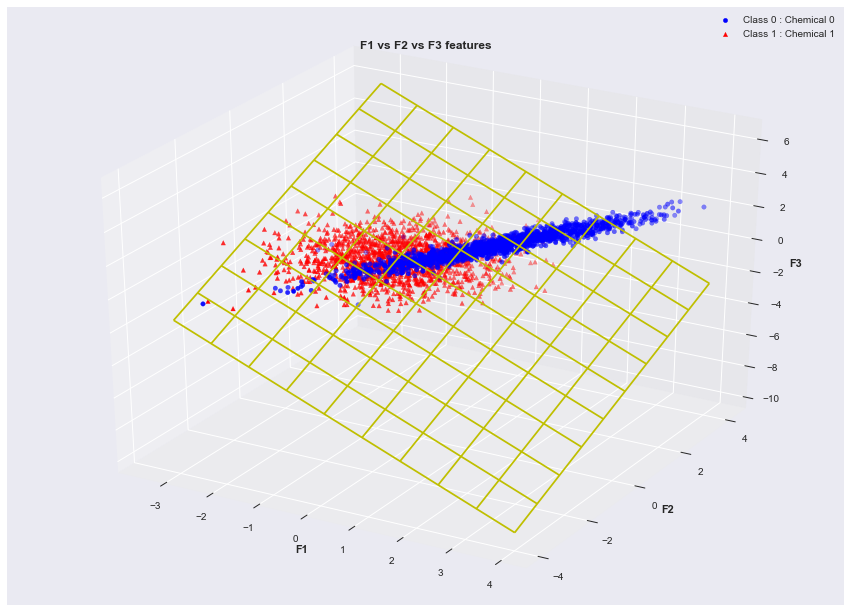

In [18]:
# Plotting Decision Boundary for Binary Classification

plt.figure(figsize=(15,11))
ax = plt.axes(projection ='3d')

x = np.linspace(-3, 4, 10)            # Taking 10 ranndom values for x from -3 to 4
y = np.linspace(-4, 4, 10)            # Taking 10 ranndom values for y from -3 to 4
x, y = np.meshgrid(x,y)
z = -(W[0]*x + W[1]*y + b)/W[2]       # As from the eqn a*x + b*y + c*z+ d = 0,     z = -(a*x + b*y + d)/c

ax.plot_wireframe(x, y, z, color='y')        # Or we can plot the solid plane by plot_surface
# ax.plot_surface(x, y, z, rstride=1, cstride=1, cmap='winter', edgecolor='none')

ax.scatter3D(df[df['label'] == 0]['f1'], df[df['label'] == 0]['f2'], df[df['label'] == 0]['f3'], label='Class 0 : Chemical 0', color='b')
ax.scatter3D(df[df['label'] == 1]['f1'], df[df['label'] == 1]['f2'], df[df['label'] == 1]['f3'], color='r', marker='^', label='Class 1 : Chemical 1')

ax.set_xlabel('F1', fontweight='bold')
ax.set_ylabel('F2', fontweight='bold')
ax.set_zlabel('F3', fontweight='bold')
plt.title('F1 vs F2 vs F3 features', fontweight='bold')

plt.legend()
plt.show()

### Predicting the Class for each case in test_data and labelling chemical 0 or 1 according to its three features.

In [19]:
# Importin the test data

dfx_test = pd.read_csv('./Chemicals Segregation Data/Testing Data/Logistic_X_Test.csv')

dfx_test.head(7)

,f1,f2,f3
0,-0.767508,-0.261859,-2.514831
1,-1.241653,1.449001,-0.413089
2,1.925270,1.931761,1.342619
3,-1.298255,1.049761,-0.527319
4,-0.964712,0.938088,-1.186328
5,-2.319673,-0.656705,0.017851
6,1.559037,1.113581,1.739047


In [20]:
# Test_Data into NDarray

XTest = dfx_test.values

print(XTest.shape, type(XTest), XTest, sep='\n\n')

(1000, 3)

<class 'numpy.ndarray'>

[[-0.76750773 -0.2618595  -2.51483147]
 [-1.24165258  1.44900144 -0.4130893 ]
 [ 1.92527007  1.93176097  1.34261917]
 ...
 [-1.18696873  0.94734729 -0.78638597]
 [-0.53232395  1.84516978 -0.9935503 ]
 [ 0.54023217  0.58099406  0.38664901]]


In [21]:
# Predicting the result {label} for the test_data : X

YTest = []
    
for i in range(XTest.shape[0]):
    p = predict(XTest[i], W, b)
    YTest.append(p)

YTest = np.array(YTest)
print(YTest.shape, type(YTest), YTest, sep='\n\n')

(1000,)

<class 'numpy.ndarray'>

[1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1
 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 1 0 1 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 1
 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 0 0
 1 1 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1
 1 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 1 1 0 1 0 1 0 0
 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 0 1
 0 1 0 1 1 0 1 1 0 1 0 1 1 0 0 0 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 0 1 1 0
 0 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 0
 1 1 1 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 0 1 0 1 0 1 1 0 1 1 1 0 0 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1 1 0 1 0
 0 0 1 0 0 0 0 1 1 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 0

In [22]:
# Now saving the result {predictions} for each cases in a DataFrame

result = dfx_test
result['label'] = YTest
result

,f1,f2,f3,label
0,-0.767508,-0.261859,-2.514831,1
1,-1.241653,1.449001,-0.413089,1
2,1.925270,1.931761,1.342619,0
3,-1.298255,1.049761,-0.527319,1
4,-0.964712,0.938088,-1.186328,1
...,...,...,...,...
995,2.877461,3.043965,2.308939,0
996,3.128835,3.115084,1.856309,0
997,-1.186969,0.947347,-0.786386,1
998,-0.532324,1.845170,-0.993550,1


In [23]:
# Creating a .csv and saving the above resulted DataFrame in it

result.to_csv('./Chemicals Segregation Data/Output/Predictions_of_Test.csv', header=True, index=False)

In [24]:
# Verifying the .csv created and the content

pd.read_csv('./Chemicals Segregation Data/Output/Predictions_of_Test.csv')

,f1,f2,f3,label
0,-0.767508,-0.261859,-2.514831,1
1,-1.241653,1.449001,-0.413089,1
2,1.925270,1.931761,1.342619,0
3,-1.298255,1.049761,-0.527319,1
4,-0.964712,0.938088,-1.186328,1
...,...,...,...,...
995,2.877461,3.043965,2.308939,0
996,3.128835,3.115084,1.856309,0
997,-1.186969,0.947347,-0.786386,1
998,-0.532324,1.845170,-0.993550,1
